![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 4: Network Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [21]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community
import pandas

plt.rc("savefig", dpi=300) # improve default resolution of graphics
sns.set(font_scale=.75)

import os
os.chdir('.') # .. is a special symbol for the directory above the current one

/Users/johnmclevey/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)
RC1014 = RC.yearSplit(2010,2014)

## Co-Author Networks

* produce network from record collection
* get quick stats

In [3]:
coauth_net = RC.networkCoAuthor() 
print(mk.graphStats(coauth_net))

The graph has 10104 nodes, 15507 edges, 1111 isolates, 0 self loops, a density of 0.000303818 and a transitivity of 0.555409


* modify network object in memory by dropping edges and self-loops
* modify network object by extracting the giant component (e.g. of *networkx*)

In [4]:
mk.dropEdges(coauth_net, minWeight = 2, dropSelfLoops = True) 
giant_coauth = max(nx.connected_component_subgraphs(coauth_net), key=len)
mk.graphStats(giant_coauth)

'The graph has 265 nodes, 443 edges, 0 isolates, 0 self loops, a density of 0.0126644 and a transitivity of 0.285714'

* can use other *networkx* functions, such as computing centralities and global network properties

/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


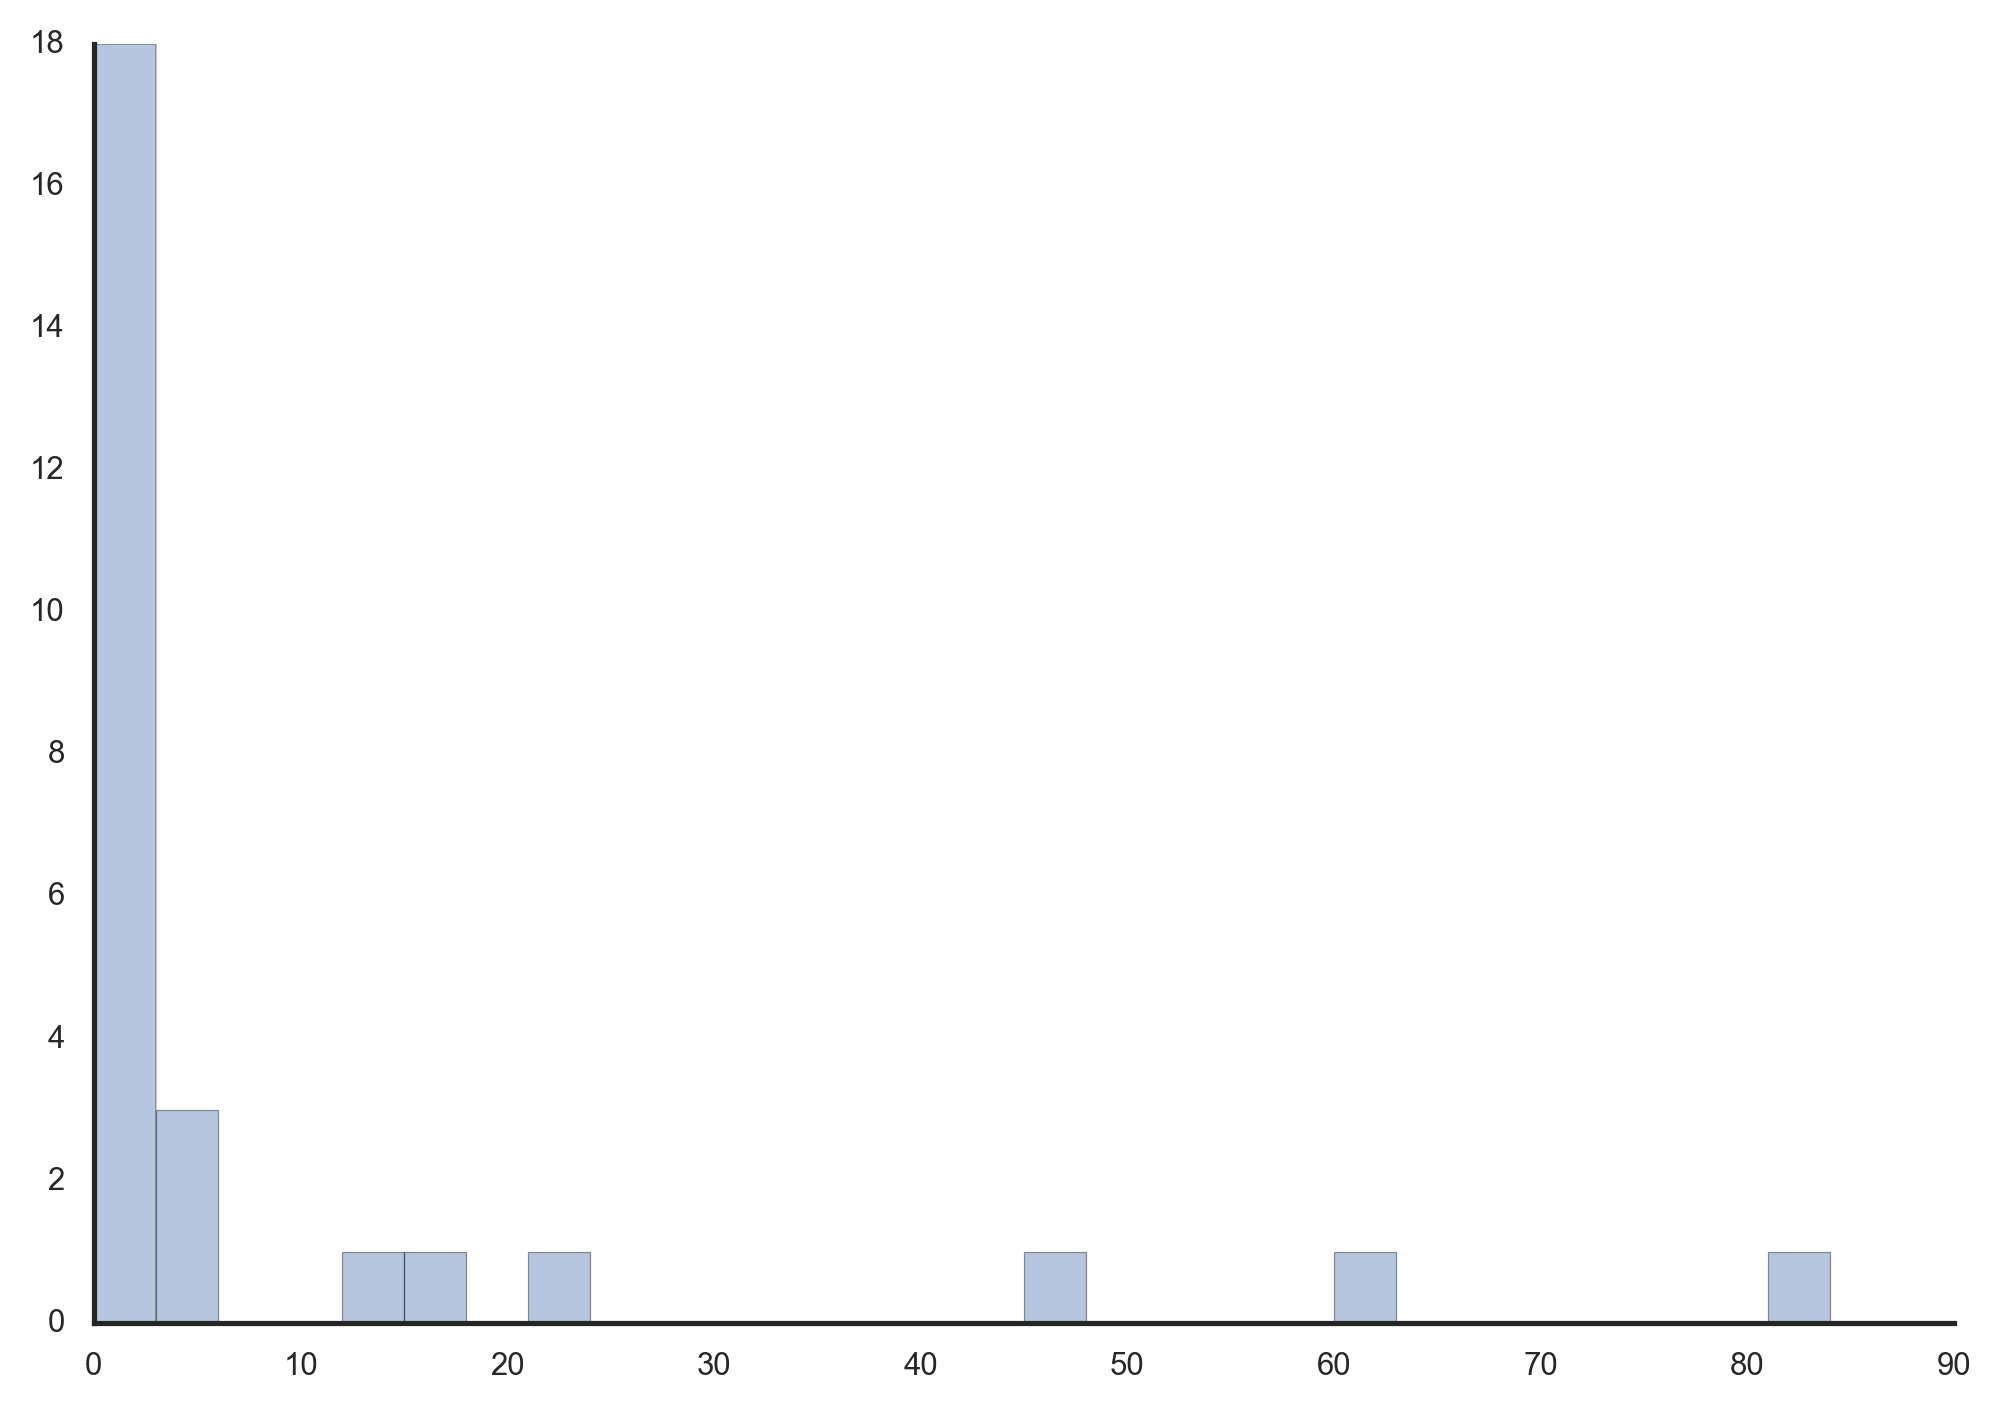

In [22]:
dh = nx.degree_histogram(giant_coauth)

with sns.axes_style("white"):
    sns.distplot(dh, kde=False, rug=False)
    sns.despine()

In [6]:
deg = nx.degree_centrality(giant_coauth)
eig = nx.eigenvector_centrality(giant_coauth)

In [8]:
cent_df = pandas.DataFrame.from_dict([deg, eig])
cent_df = pandas.DataFrame.transpose(cent_df)
cent_df.columns = ['degree', 'eigenvector']
cent_df[:10]

,degree,eigenvector
"Abrizah, A.",0.007576,2.247156e-05
"Albarran, Pedro",0.011364,5.906076e-07
"Archambault, Eric",0.011364,1.818886e-04
"Arencibia-Jorge, Ricardo",0.003788,4.431288e-04
"Arora, Sanjay K.",0.007576,1.219429e-05
"Arsenault, Clement",0.007576,3.405122e-05
"Bar-Ilan, Judit",0.022727,2.385037e-05
"Barjak, Franz",0.003788,2.244758e-05
"Barnett, George A.",0.003788,1.801193e-03
"Bauer, Johann",0.003788,3.188824e-02


/Users/johnmclevey/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


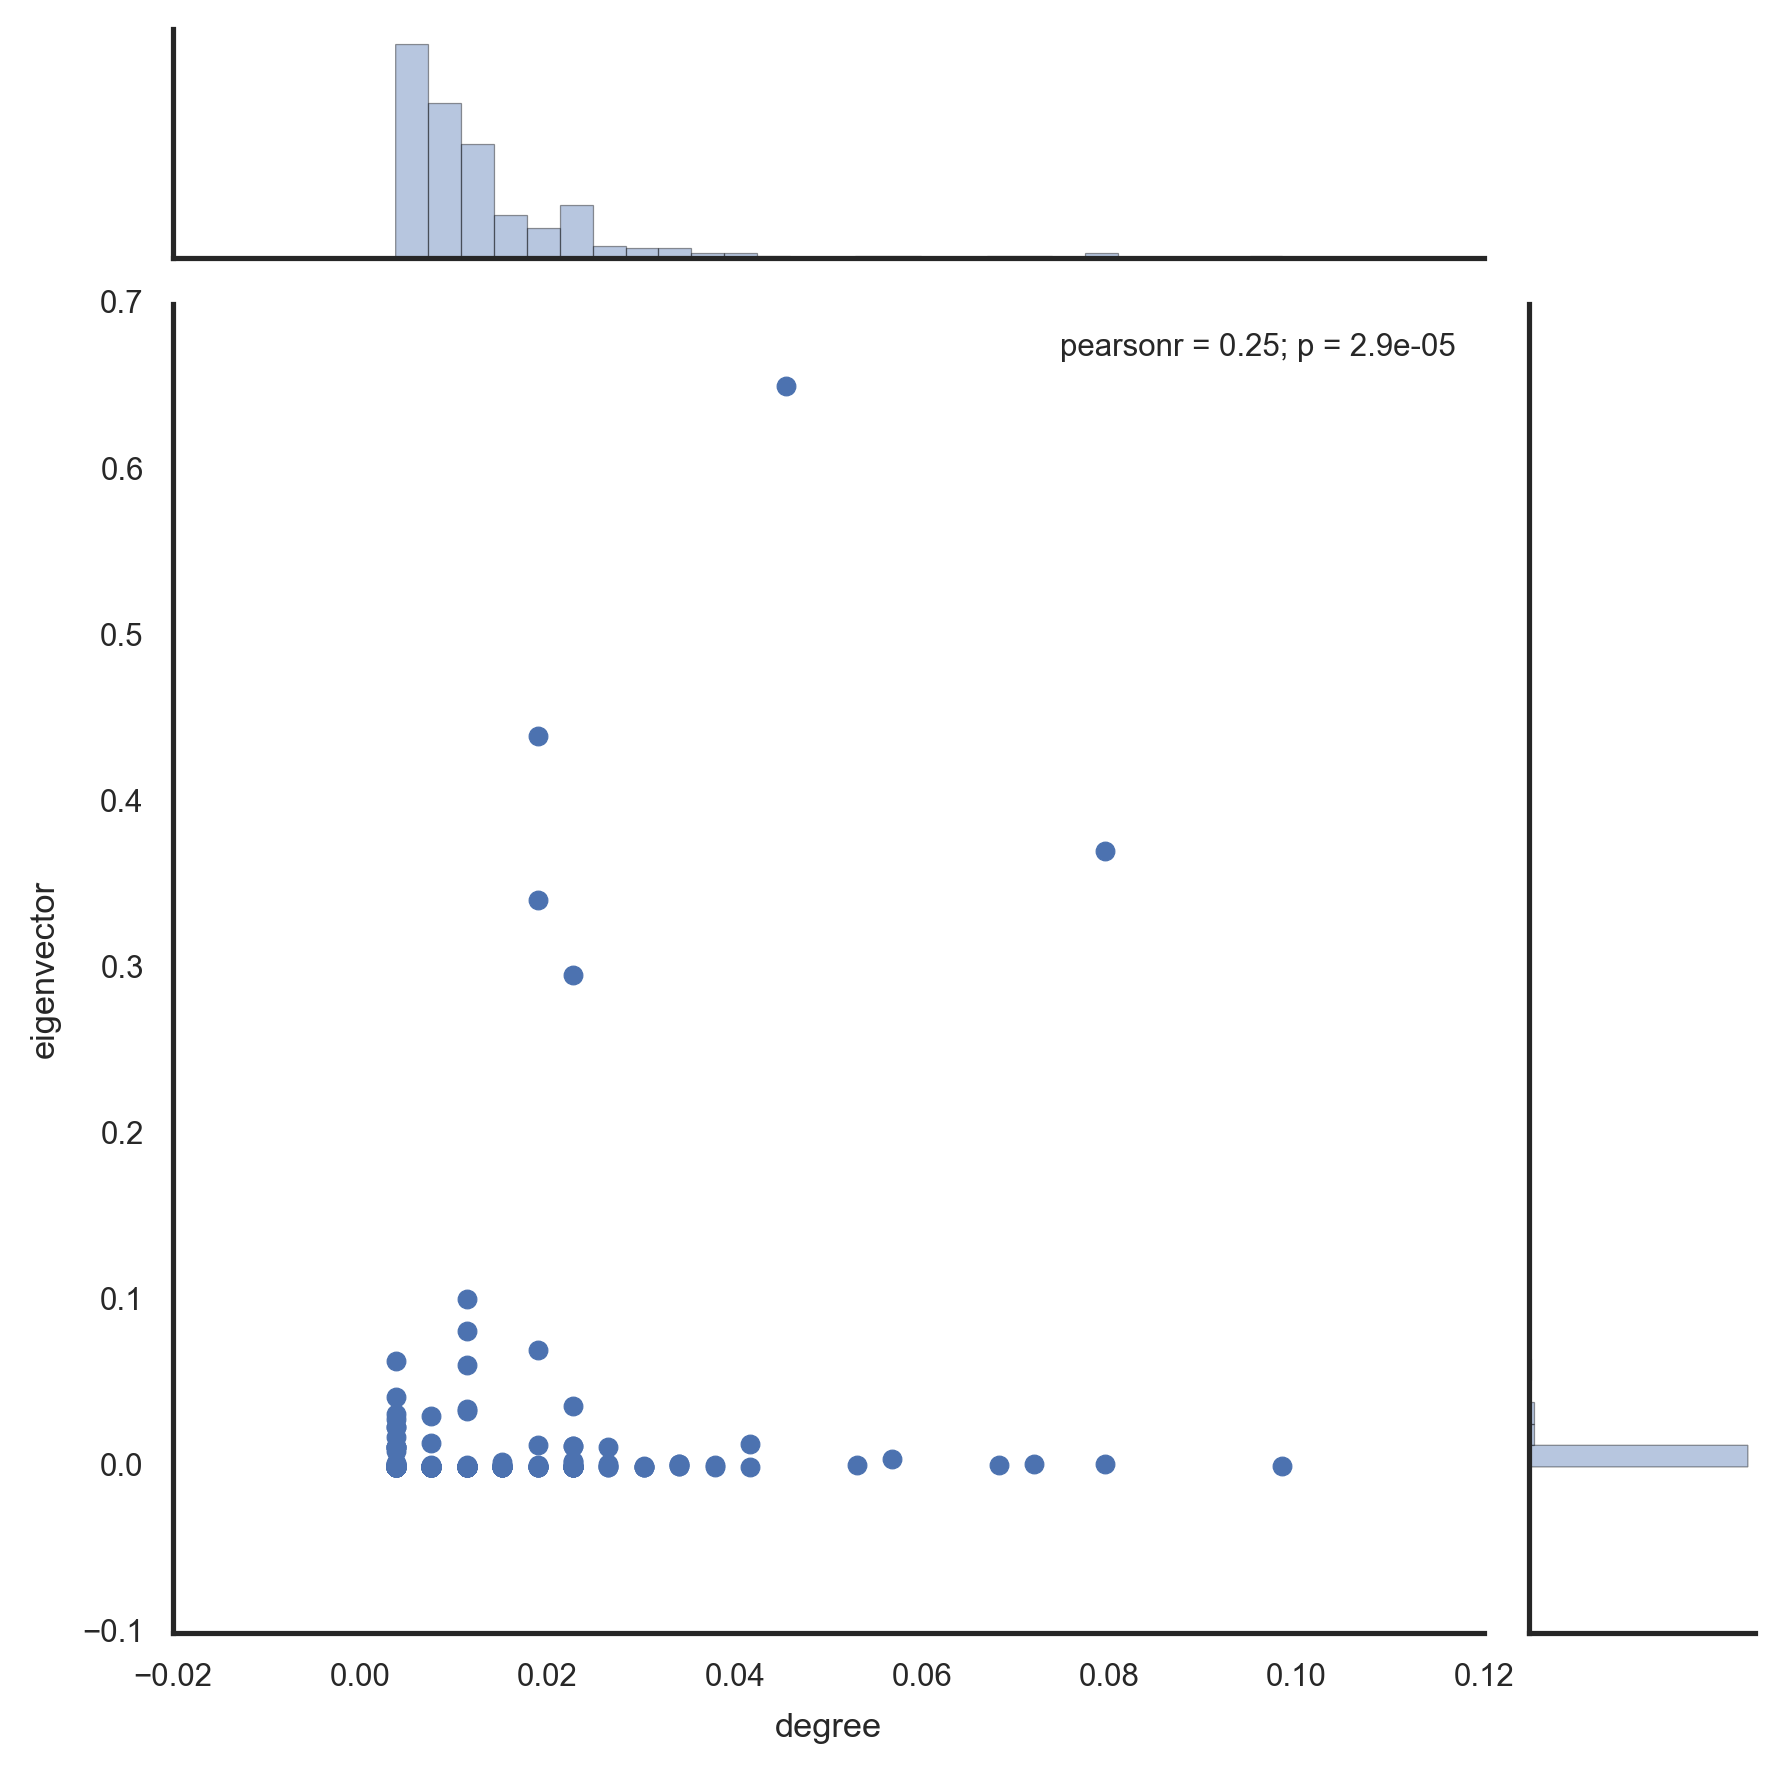

In [17]:
# not sure why it won't accept my x and y axis limits at 0... Ried, any thoughts? 
with sns.axes_style("white"):
    sns.jointplot(x="degree", y="eigenvector", data=cent_df)
    sns.despine()

* *networkx* does an adequete job of creating static visualizations of networks, provided they are not too large

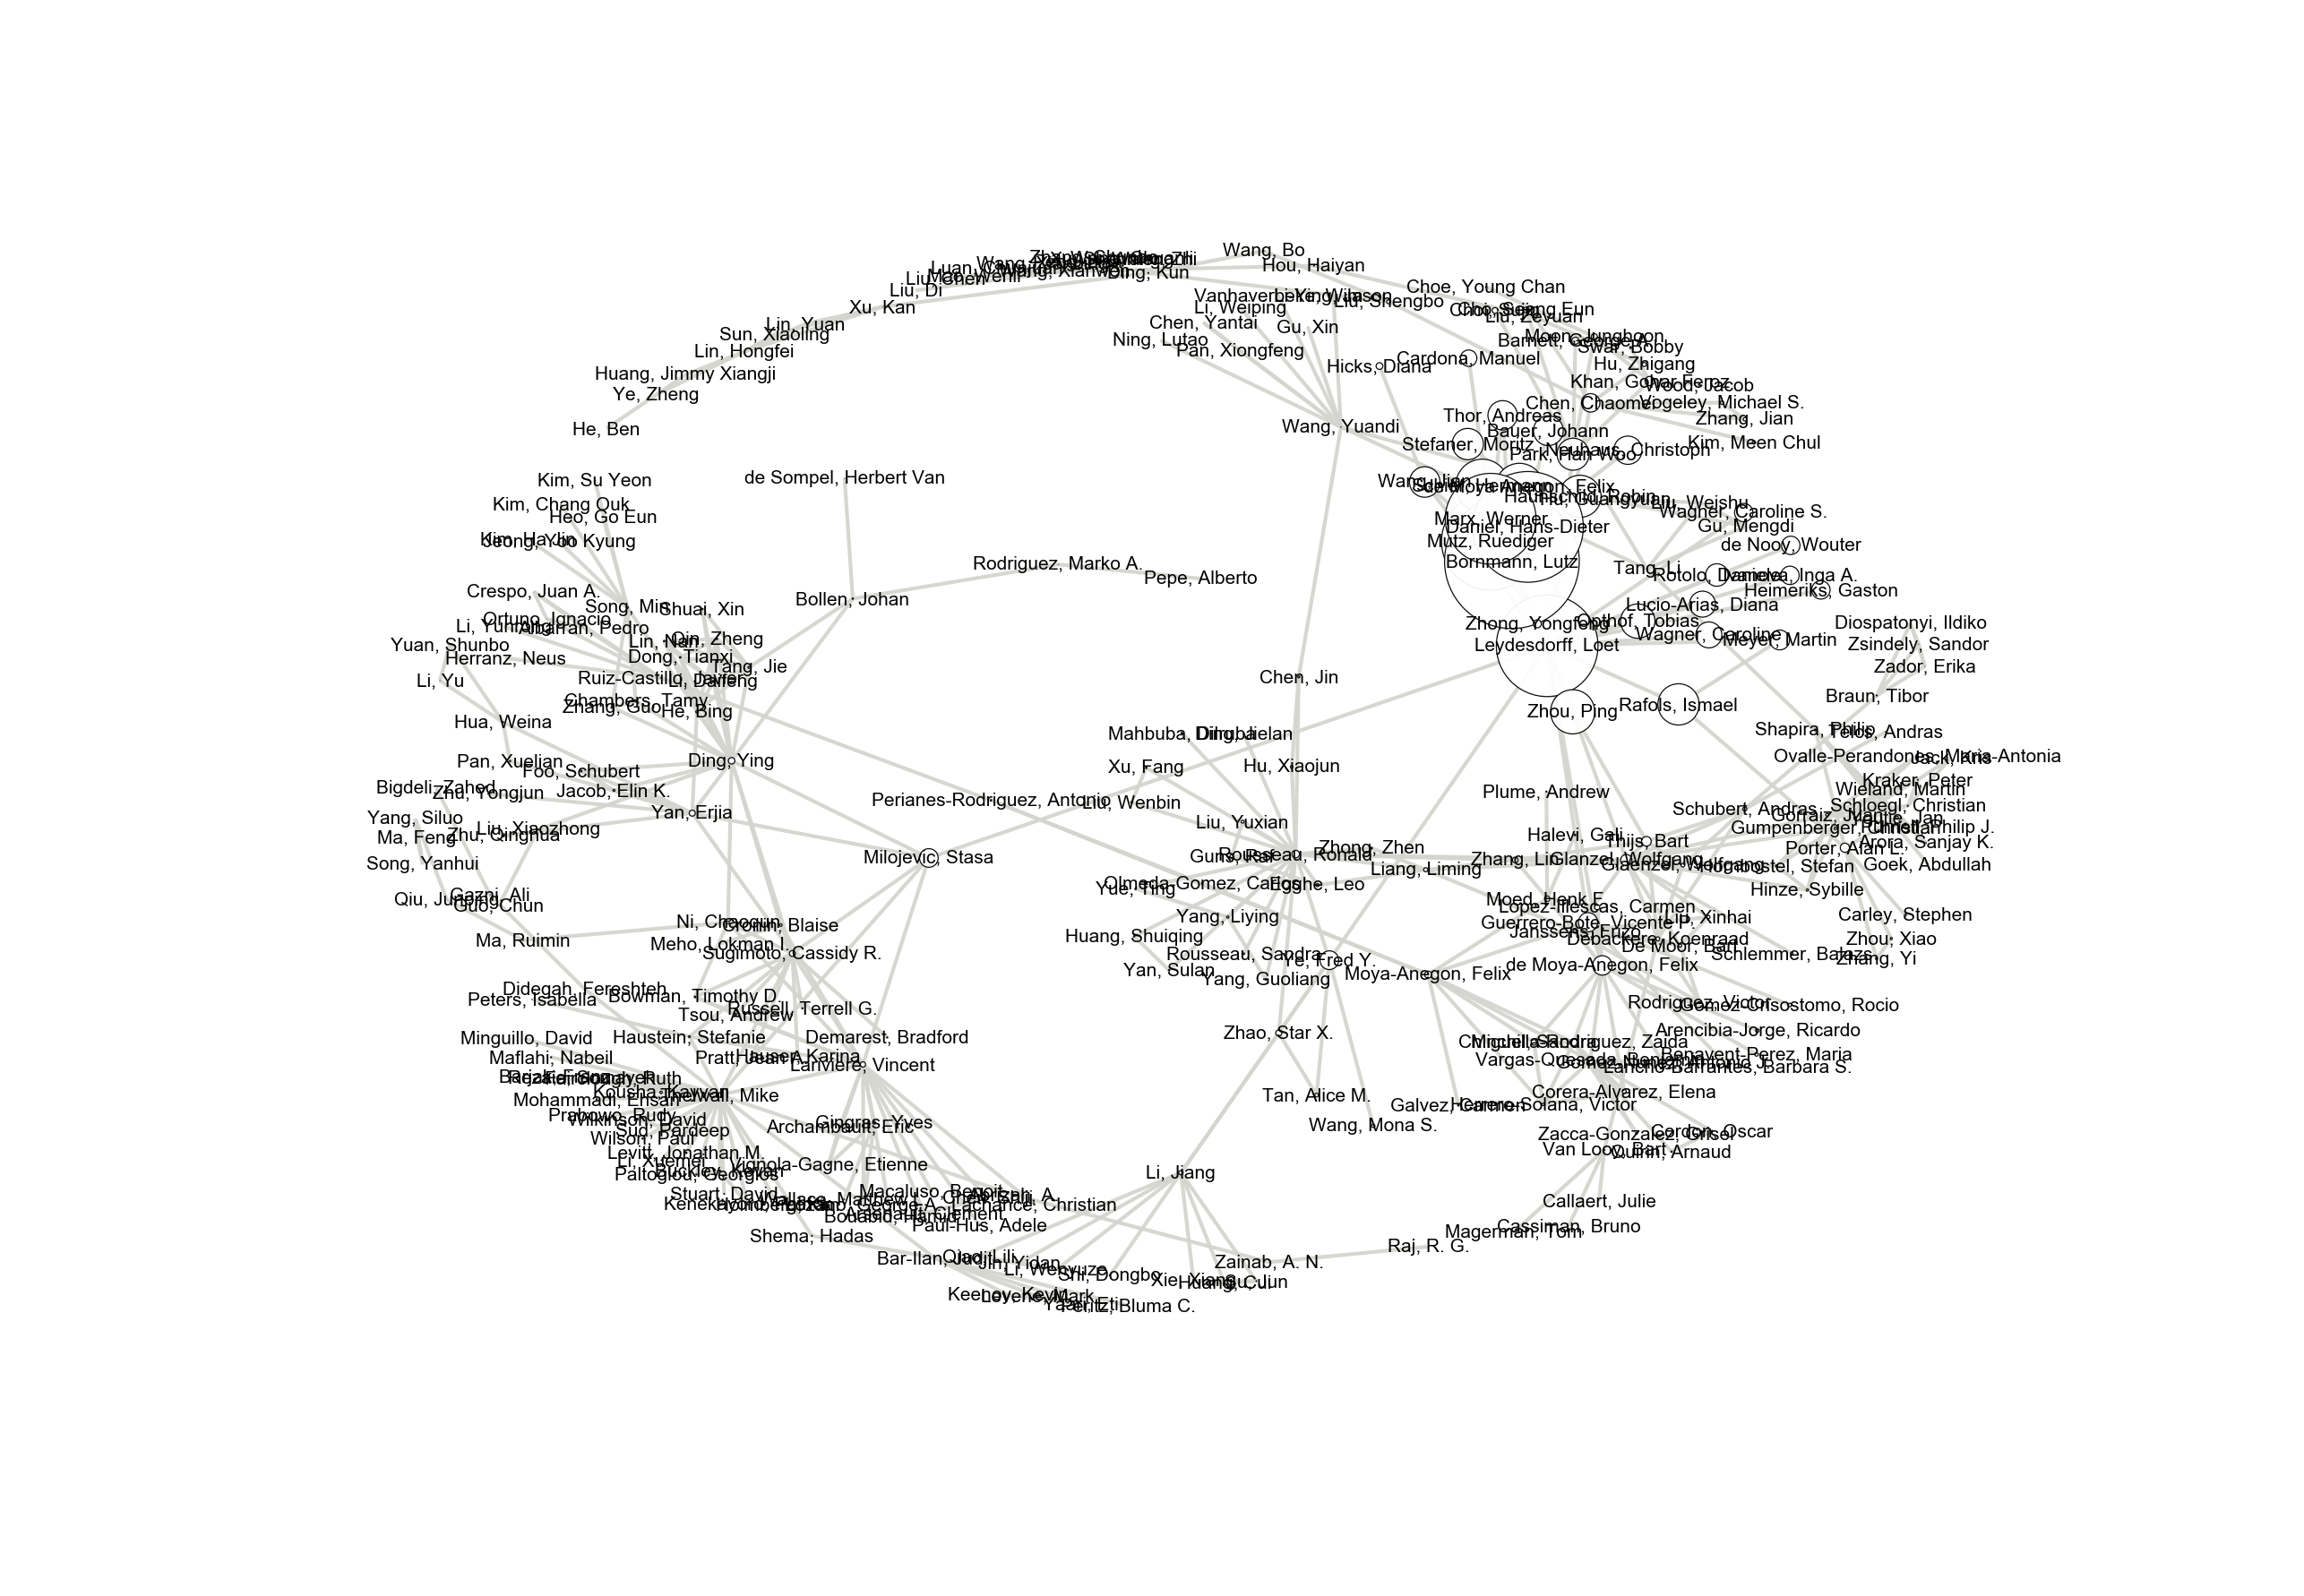

In [18]:
eig = nx.eigenvector_centrality(giant_coauth)
size = [2000 * eig[node] for node in giant_coauth]

nx.draw_spring(giant_coauth, node_size = size, with_labels = True, font_size = 5, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_coauthors.pdf')

* use the *community* package to compute modularity and detect community structure in the network

In [ ]:
# no idea why, but this doesn't run on my laptop... 
# I used it (see article) before and it works fine on Jillian's machine

partition = community.best_partition(giant_coauth)
modularity = community.modularity(partition, giant_coauth) 
print('Modularity:', modularity)

In [ ]:
colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant, node_color=colors , cmap=plt.cm.Accent , node_size = degSize)
plt.savefig('figures/coauthors_community.pdf')

# Co-Citation

In [29]:
journal_cocite = RC1014.networkCoCitation(coreOnly = True) 
mk.dropEdges(journal_cocite , minWeight = 3)
mk.graphStats(journal_cocite)

'The graph has 1261 nodes, 1119 edges, 889 isolates, 21 self loops, a density of 0.00140856 and a transitivity of 0.300846'

In [30]:
# visualize the giant component only
giantJournal = max(nx.connected_component_subgraphs(journal_cocite), key=len)

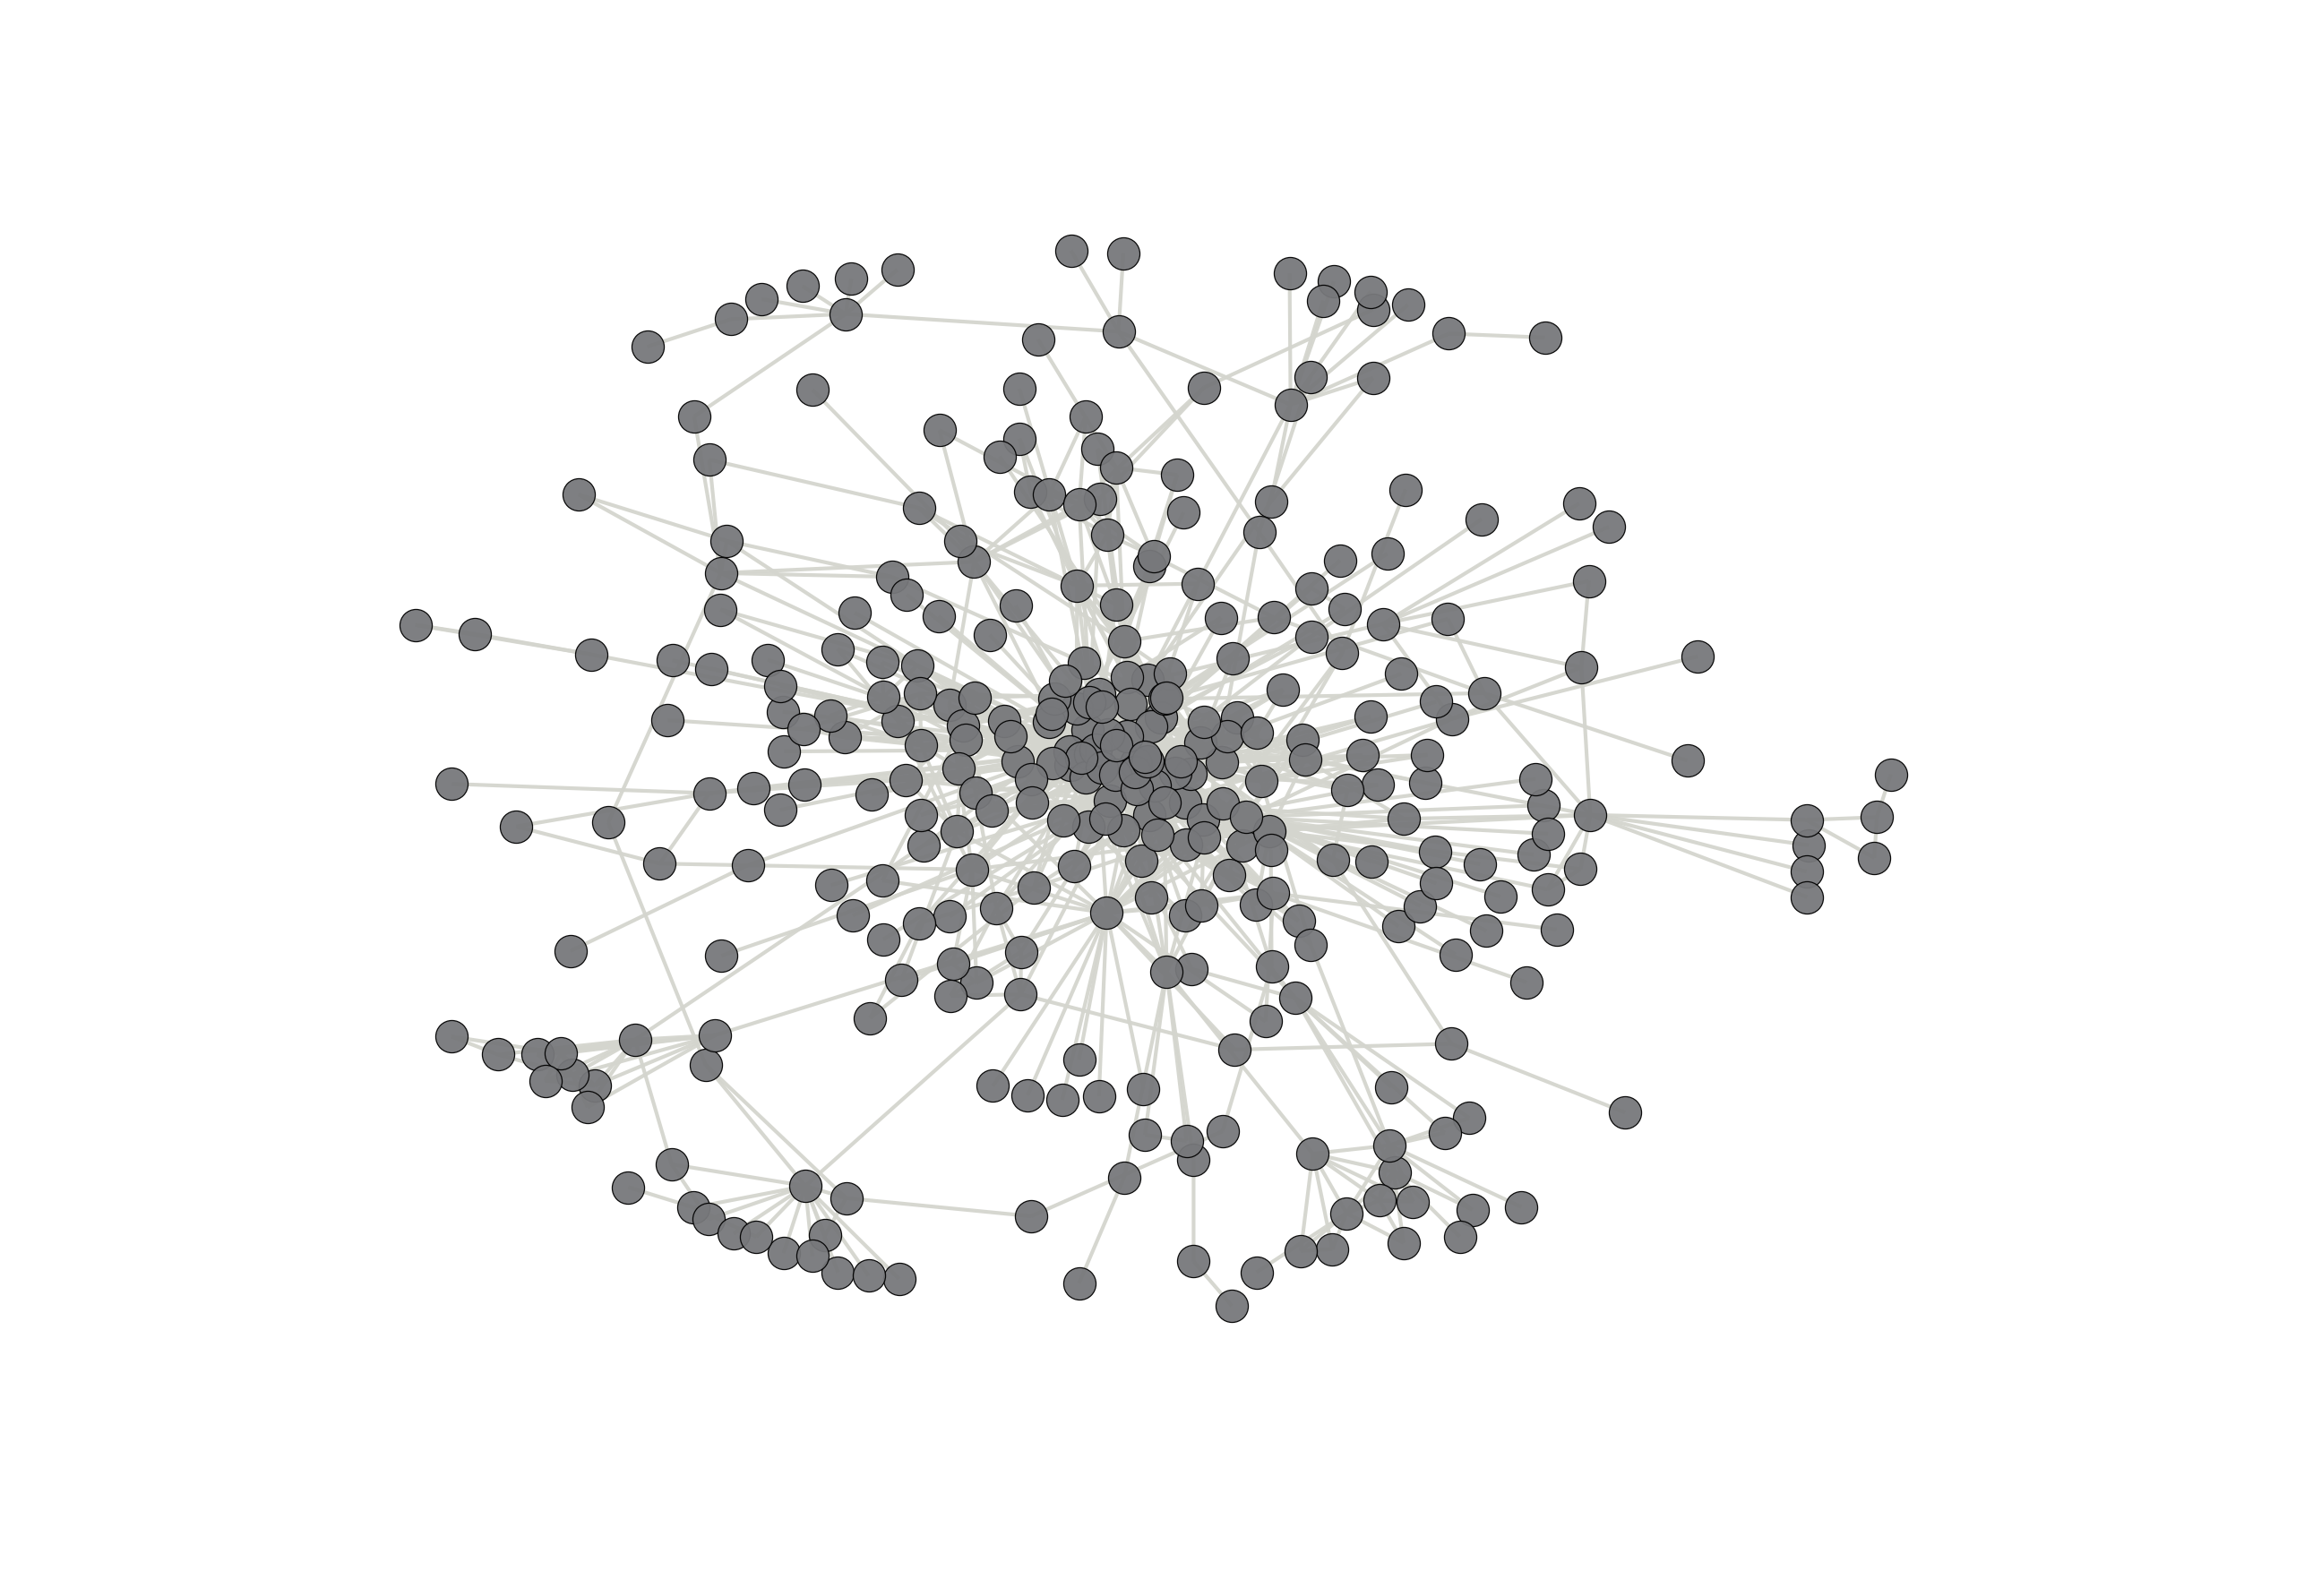

In [40]:
nx.draw_spring(giantJournal, with_labels = False, node_size = 75, 
              node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_journal_cocite.pdf')

In [27]:
partition = community.best_partition(giant) 
modularity = community.modularity(partition, giant) 
print(modularity)

colors = [partition[n] for n in giant.nodes()] 
nx.draw_spring(giant, node_color=colors, with_labels = False, cmap=plt.cm.Accent, node_size = 75)
plt.savefig('figures/network_journal_cocite_community.pdf')

AttributeError: 'module' object has no attribute 'best_partition'

# Co-Investigator Networks

In [ ]:
# Reid, can you fix the bugs in this network generator? Thanks. -JM
sshrc_grants = mk.GrantCollection('raw_data/grants/SSHRC/')
ci_nets = sshrc_grants.networkCoInvestigator(targetTags = 'Institution') 
# ci_nets = sshrc_grants.networkCoInvestigator(nodeType = 'institution') 
mk.graphStats(ci_nets)

In [ ]:
nx.draw_spring(ci_nets, with_labels = False, node_size = 100)
plt.savefig('figures/network_coinvestigator.pdf')

# One-Mode Networks (e.g. Keyword Co-Occurance)

Going back to the information science and bibliometrics `record collection`...

In [ ]:
keywords = RC1014.networkOneMode('keywords')
mk.graphStats(keywords)

In [ ]:
mk.dropEdges(keywords, minWeight = 10, dropSelfLoops = True) 
mk.dropNodesByDegree(keywords, minDegree = 1, useWeight = False)

keywordsGiant = max(nx.connected_component_subgraphs(keywords), key=len)
mk.graphStats(keywordsGiant)

In [ ]:
eig = nx.eigenvector_centrality(keywordsGiant)
size = [2000 * eig[node] for node in keywordsGiant]

nx.draw_spring(keywordsGiant, with_labels = False, node_size = size, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_keywords.pdf')

# Two-Mode Networks

In [ ]:
two_mode = RC1014.networkTwoMode('keywords', 'authorsFull') 
mk.dropEdges(two_mode, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(two_mode, minDegree = 1, useWeight = False)

two_mode = max(nx.connected_component_subgraphs(two_mode), key=len)
mk.graphStats(two_mode)

In [ ]:
deg = nx.degree_centrality(two_mode)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(two_mode, with_labels = False, node_size = size, 
               node_color = '#FFFFFF', edge_color = "#D4D5CE", alpha = .95)

# Multi-Level Networks

In [ ]:
multilevel = RC1014.networkMultiLevel('keywords', 'authorsFull')
mk.dropEdges(multilevel, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(multilevel, minDegree = 1, useWeight = False)

multilevelGiant = max(nx.connected_component_subgraphs(multilevel), key=len)
mk.graphStats(multilevelGiant)

In [ ]:
deg = nx.degree_centrality(multilevelGiant)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(multilevelGiant, with_labels = False, node_size = size, 
               node_color = '#FFFFFF', edge_color = "#D4D5CE", alpha = .95)

# Writing Networks to Disk

In [ ]:
mk.writeGraph(coauth_net , 'generated_datasets/journal_document_cocitework')

# Interactive Network Visualizations with *mkD3*

Jillian, this section is all yours. :-)